In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
datanya = '/content/flood.csv'
df = pd.read_csv(datanya)
print(df.head())

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

In [5]:
missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


Matriks Korelasi:
                                 MonsoonIntensity  TopographyDrainage  \
MonsoonIntensity                         1.000000           -0.003470   
TopographyDrainage                      -0.003470            1.000000   
RiverManagement                          0.002247            0.002492   
Deforestation                           -0.005384            0.002046   
Urbanization                             0.005092            0.000116   
ClimateChange                            0.005959           -0.002288   
DamsQuality                              0.002790           -0.004472   
Siltation                               -0.003191            0.010675   
AgriculturalPractices                    0.002723           -0.004550   
Encroachments                           -0.003723           -0.007272   
IneffectiveDisasterPreparedness          0.002358            0.001328   
DrainageSystems                         -0.000118           -0.001608   
CoastalVulnerability             

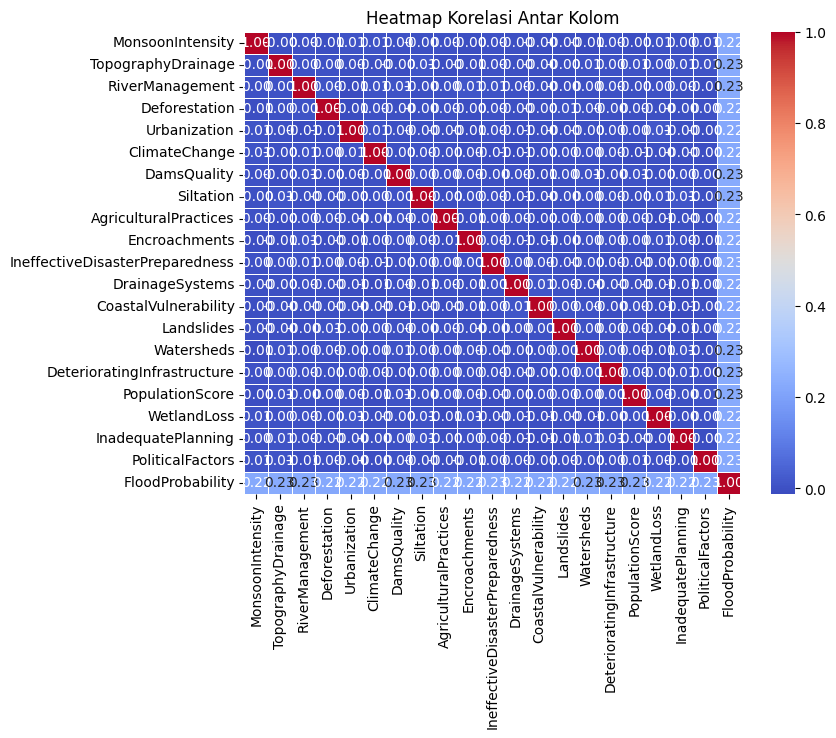

In [6]:
# Hitung matriks korelasi
correlation_matrix = df.corr()

# Tampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kolom")
plt.show()

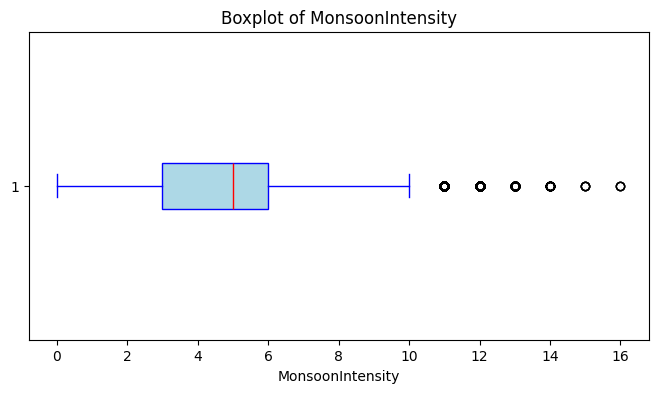

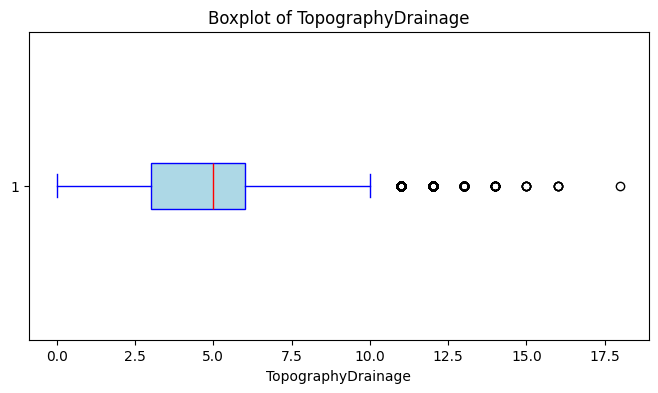

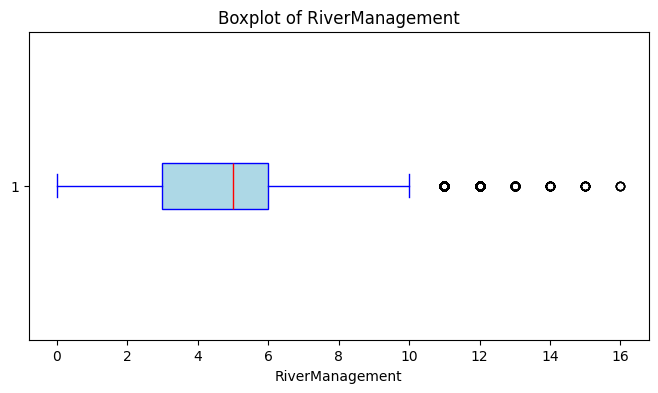

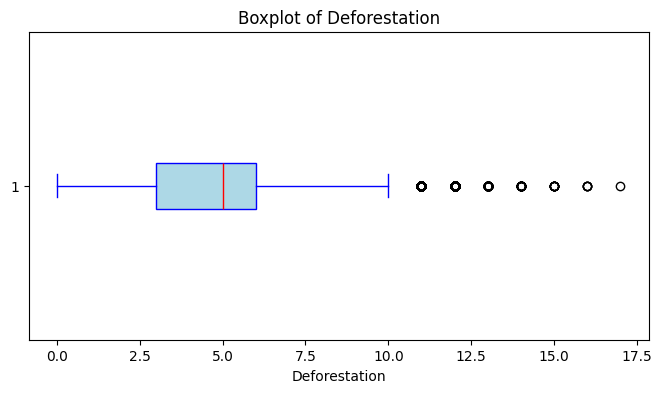

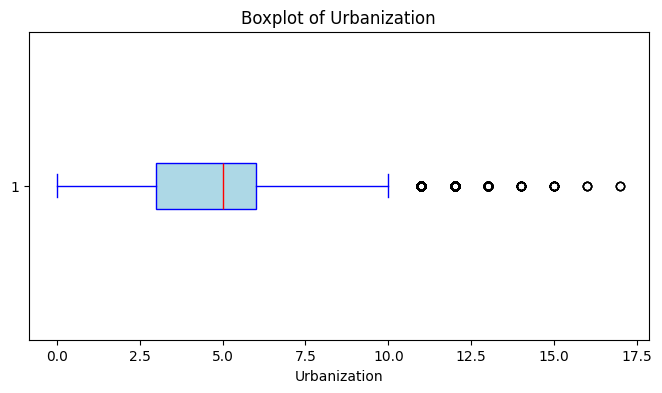

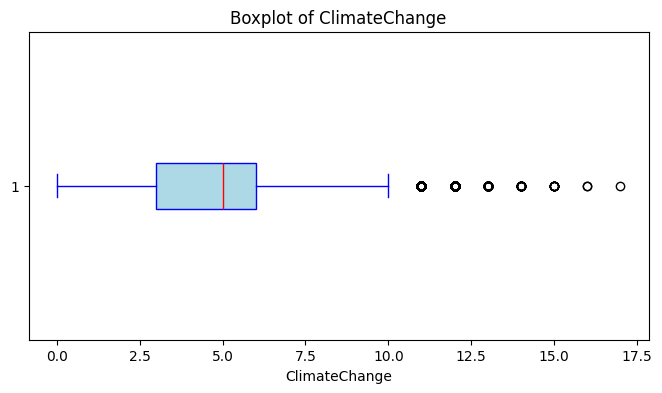

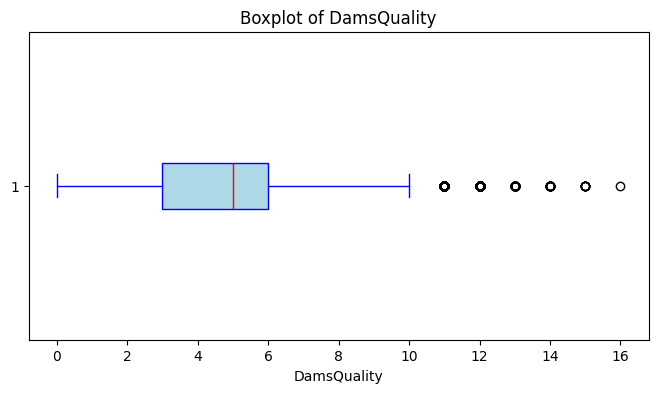

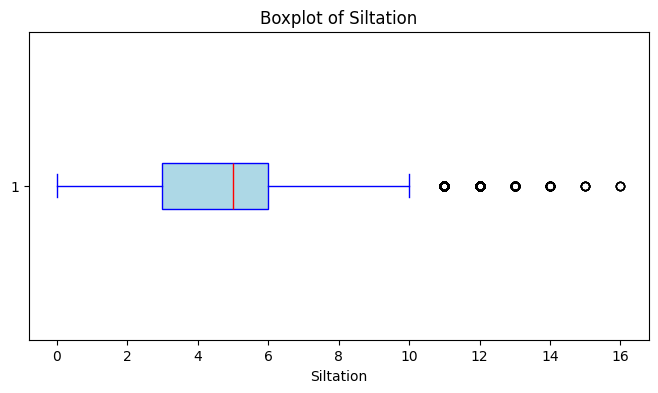

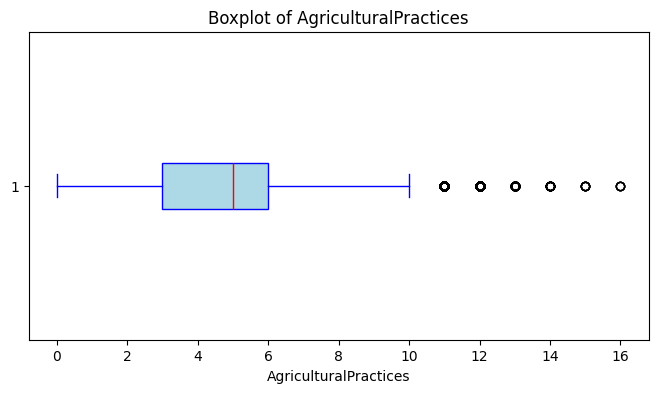

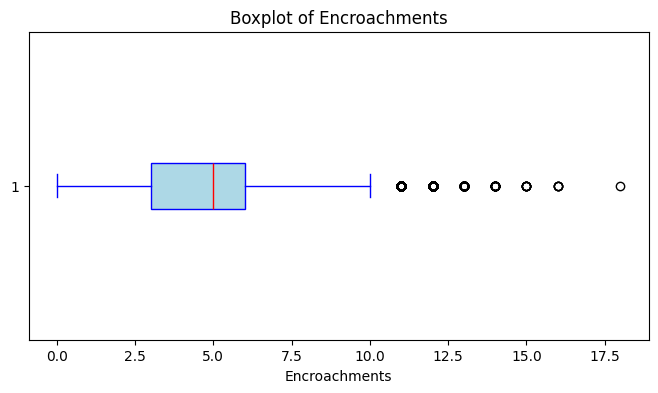

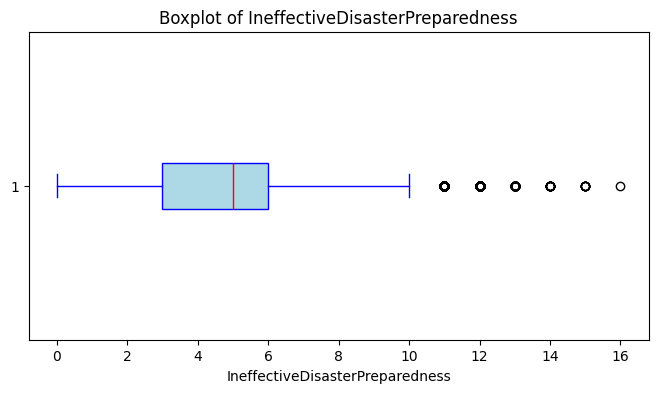

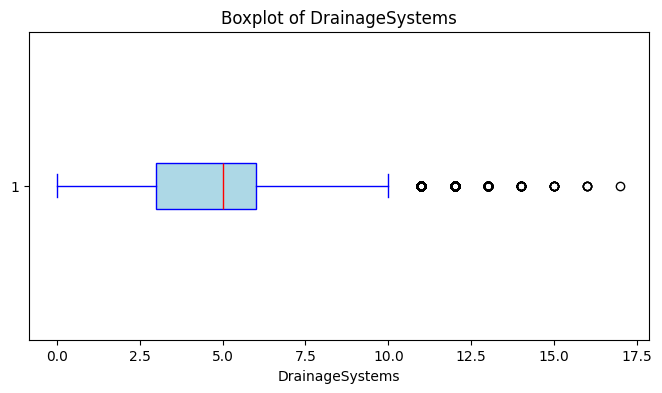

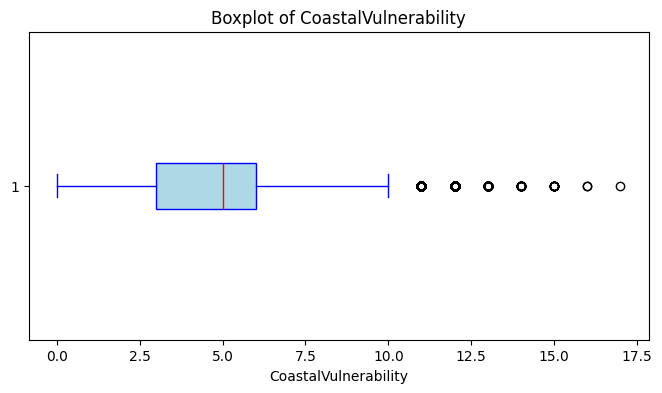

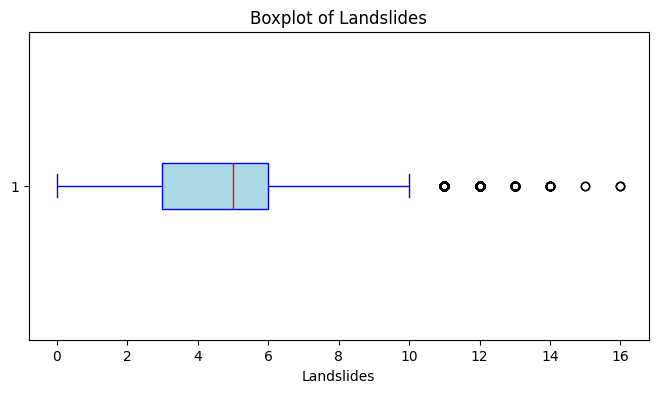

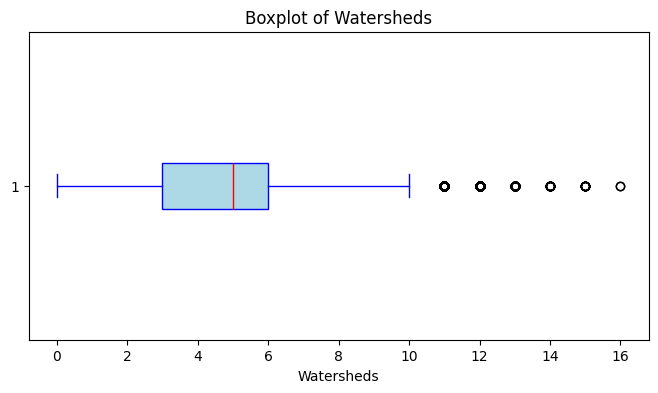

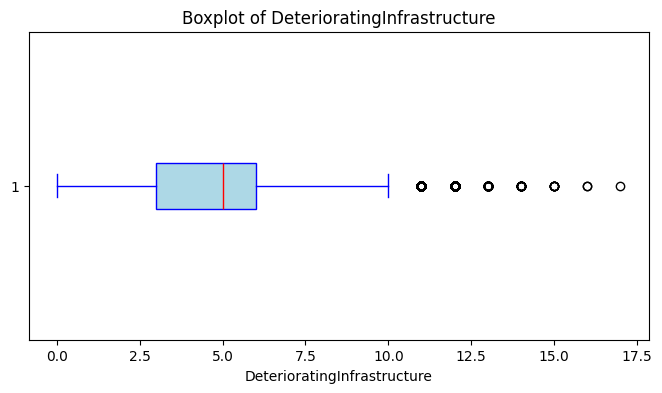

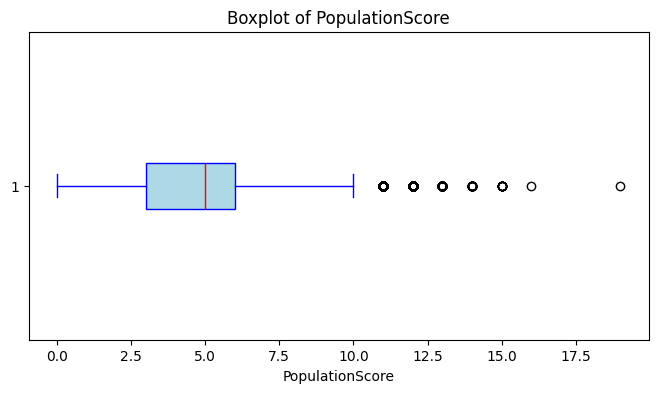

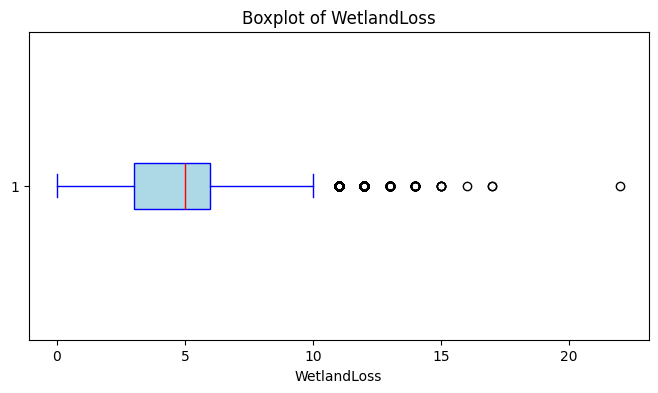

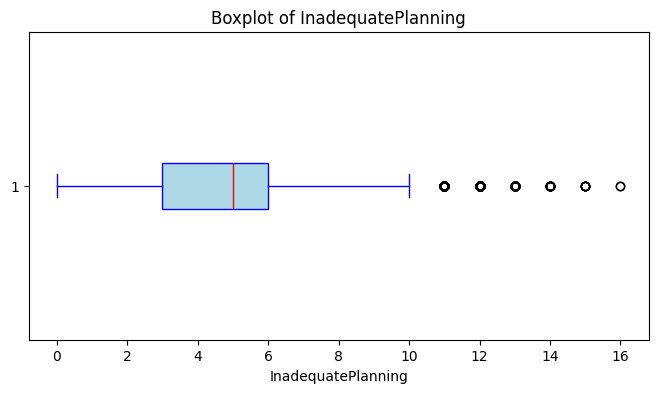

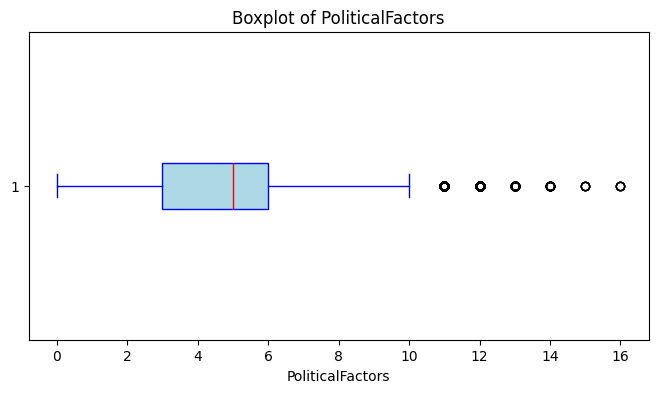

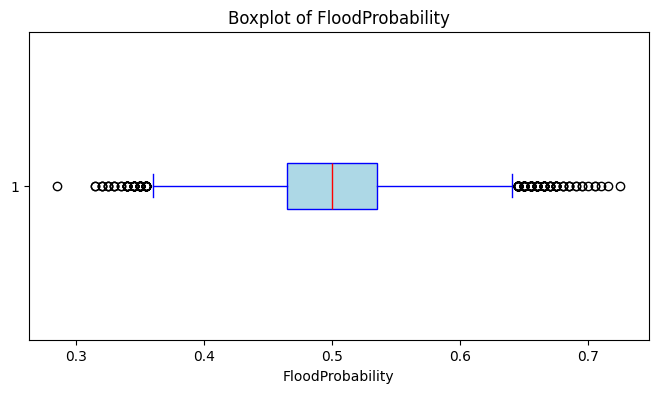

In [7]:
# Pilih kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualisasi boxplot untuk setiap kolom numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'))
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [8]:
# Pisahkan target dan fitur
target = 'FloodProbability'
features = df.drop(columns=[target])

Mean Squared Error: 0.0006737141275000004
R-squared: 0.7294957103200914


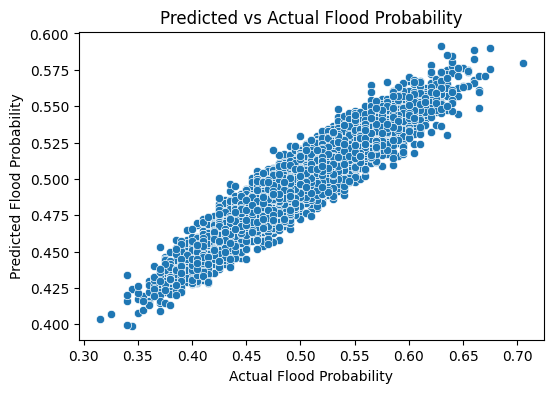

In [9]:
X = features
y = df[target]
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest untuk regresi
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Predicted vs Actual Flood Probability")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0385 - val_loss: 8.2566e-04
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 5.2395e-04 - val_loss: 1.3640e-04
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0794e-04 - val_loss: 7.1333e-05
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.3164e-05 - val_loss: 4.0240e-05
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 3.4330e-05 - val_loss: 2.5459e-05
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.3856e-05 - val_loss: 1.2030e-05
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1466e-05 - val_loss: 1.9053e-05
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.8184e-06 - val_loss: 1.4944e-05
Epoch 9/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.6394e-05 - val_loss: 6.5788e-07
Epoch 10/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1392e-05 - val_loss: 1.5359e-06
Epoch 11/100
1250/1250 ━━━━━━━

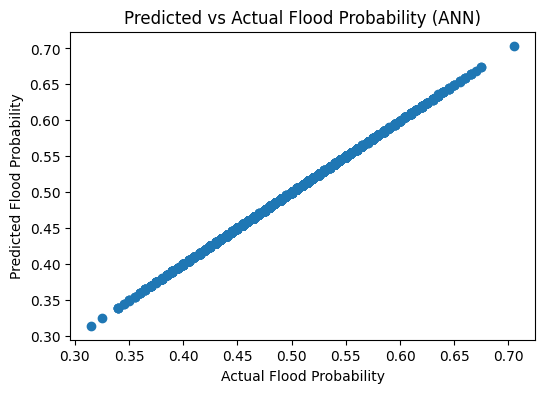

In [10]:
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan fitur (ANN biasanya membutuhkan data yang diskalakan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model ANN
model = Sequential()

# Input layer dan hidden layer pertama
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer kedua
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Prediksi menggunakan data testing
y_pred = model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualisasi prediksi vs aktual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.title("Predicted vs Actual Flood Probability (ANN)")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.show()